In [110]:
%matplotlib inline
import math
import numpy as np
import random
import scipy.stats

import first
import hypothesis
import thinkstats2
import thinkplot

import normal

**Central Limit Theorem** if we add up n values for almost any distribution the distribution of the sum converges to normal as n increases.

*  values have to be drawn independently
*  values have to come from same distribution (relaxed)
*  distribution has to have finite mean and variance
*  rate of convergence depends on skewness of the distribution

**t distribution** the sampling distribution of correlation under the null hypothesis

**Exercise 14.1**

*  choose distribution for growth factor by year
*  generate a sample of adult weights choosing from the distribution of birthweights, choosing a sequence from f and computing the product
*  what value of n is needed to converge to lognormal?


In [2]:
live, firsts, others = first.MakeFrames()

nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


average male weight:

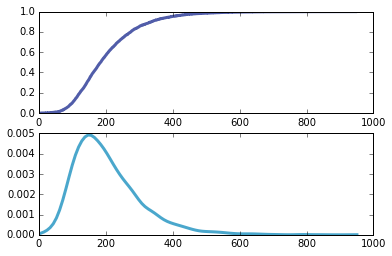

median 184.872572709
mean 204.748234993
iqr 134.631023354 254.752246774
ci 82.7675631776 396.174628719


In [124]:
np.random.seed(17)
def makefDist(n=18, mu=0.17, sigma=0.1, iters=1000):
    samples = np.random.lognormal(mu, sigma, n)
    return samples

def genWeight(birthweights, age):
    """
    birthweights: list of birthweights
    age: int indicted age
    """
    adultweights = []
    for bw in birthweights:
        fDist = makefDist(age)
        fDist = np.append(fDist, bw)
        fDist = np.log(fDist)
        fDist = np.sum(fDist)
        result = np.exp(fDist)
        adultweights.append(result)
    return adultweights

boyWeights = live[live.babysex==1].totalwgt_lb
boyWeights = boyWeights.dropna()

aWeights = genWeight(boyWeights, 19)
thinkplot.PrePlot(2, rows=2)
thinkplot.SubPlot(1)
cdf = thinkstats2.Cdf(aWeights)
thinkplot.Cdf(cdf)
thinkplot.SubPlot(2)
pdf = thinkstats2.EstimatedPdf(aWeights)
thinkplot.Pdf(pdf)
thinkplot.Show()

print "median",cdf.Percentile(50)
print "mean", cdf.Mean()
print "iqr", cdf.Percentile(25), cdf.Percentile(75)
print "ci", cdf.Percentile(5), cdf.Percentile(95)

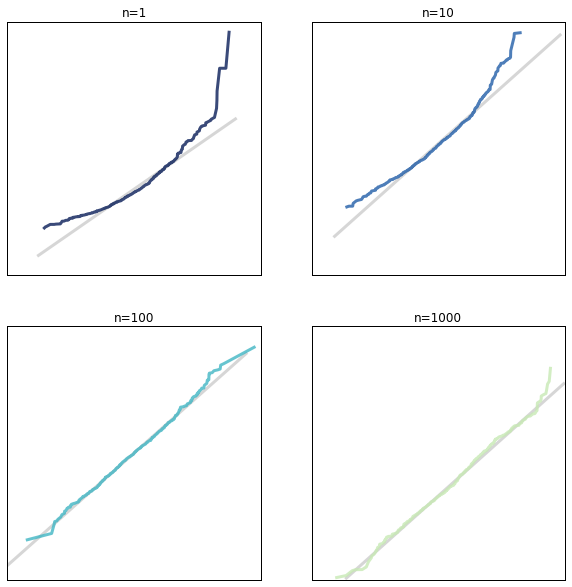

In [126]:
def makeAWsamples(nVals, aWeights, iters=1000):
    samples = []
    for n in nVals:
        sample = [np.sum(np.random.choice(aWeights, n)) 
                  for _ in range(iters)]
        samples.append((n, sample))
    return samples
    
nVals = [1, 10, 100, 1000]
samples = makeAWsamples(nVals, aWeights)

thinkplot.PrePlot(len(nVals), rows=len(nVals)//2, cols=len(nVals)//2)
normal.NormalPlotSamples(samples)

The correct answer here was to sample the "factors" from a normal distribution

###Exercise 14.2


In [132]:
dist1 = normal.SamplingDistMean(firsts.prglngth, len(firsts))
dist2 = normal.SamplingDistMean(others.prglngth, len(others))

dist = dist1 - dist2
print 'Standard Error:', dist.sigma
print '90% CI', dist.Percentile(5), dist.Percentile(95)

Standard Error: 0.0566695304191
90% CI -0.0151758158699 0.171250349425


standard error is equal to the the square root of the variance in the distribution of differences


###Exercise 14.3

before: mean, p-value -1.66 4.73095323208e-05
after: mean, p-value -0.26 0.125267987207
diff in gender gap: mean, p-value 1.4 0.00182694836898


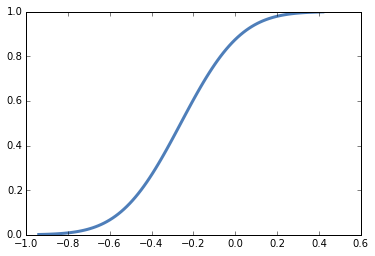

In [152]:
##null hypothesis is that boys and girls scores come 
##from the same population
male_before = normal.Normal(3.57, 0.28**2)
male_after = normal.Normal(3.44, 0.16**2)

fem_before = normal.Normal(1.91, 0.32**2)
fem_after = normal.Normal(3.18, 0.16**2)

diff_before = fem_before - male_before
#thinkplot.Cdf(diff_before)
diff_after = fem_after - male_after
# thinkplot.Cdf(diff_after)

print "before: mean, p-value", diff_before.mu, 1-diff_before.Prob(0)
print "after: mean, p-value", diff_after.mu, 1-diff_after.Prob(0)

diff =  diff_after - diff_before
# thinkplot.Cdf(diff)
print "diff in gender gap: mean, p-value", diff.mu, diff.Prob(0)

The CDF is key to understanding this problem.  

The null hypothesis for the first part is that there is no difference in these distributions, so the p-test is 1-diff.Prob(0).  Probability that given these dists, the diff is 0   

For the second part, the null hypothesis is that there is a difference in probabilities, so p-test is diff.Prob(0)